___
# Importy


In [1]:
import numpy as np
from scipy.optimize import bisect, brentq, newton, root_scalar, newton_krylov
from scipy.linalg import norm, solve
import pandas as pd
import matplotlib.pyplot as plt

___
# Zadanie 1
Wszystkie zaimplementowane metody posłużą do obliczenia pierwiastków równania:
$$ \tg{(\pi - x)} -x = 0 $$
Pochoda funkcji z tego równania to:
$$ \frac{df}{dx} = \frac{-1}{\cos^2{(\pi - x)}} - 1 = \frac{-1}{\cos^2{x}} - 1$$

In [27]:
def function(x): return np.tan(np.pi - x) - x
def derivative(x): return (-1/(np.cos(x)**2)) - 1

## Metoda Bisekcji
Zaimplementowana funkcja sprawdza, czy funkcja zmienia znak na końcach przedziału. W każdej iteracji oblicza środek przedziału, sprawdzając, czy w tym punkcie funkcja ma wartość równą zero, lub zmienia przedział na połowę, w której funkcja zmienia znak. Iteracje trwają aż do spełnienia warunku tolerancji lub osiągnięcia maksymalnej liczby iteracji. Funkcja zwraca przybliżony pierwiastek oraz liczbę iteracji i operacji arytmetycznych wykonanych w trakcie obliczeń.

In [28]:
def bisection(func, a, b, tol, max_iter=1000):

    iter_count = 0
    mult_count = 0
    add_count = 0
    if func(a) * func(b) >= 0:
        raise ValueError('Funkcja musi mieć różne znaki na końcach przedziału [a, b].')
    add_count += 4
    mult_count += 1

    while (b - a) / 2 > tol and iter_count < max_iter:
        iter_count += 1
        add_count += 1
        mult_count +=1

        c = (a + b) / 2  
        fa = func(a)
        fc = func(c)
        add_count += 5
        mult_count +=1

        if fc == 0:  
            return c, iter_count, mult_count, add_count
        elif fa * fc < 0:
            b = c  
        else:
            a = c  
        mult_count += 1

    x = (a + b) / 2  
    add_count += 1  
    mult_count += 1  

    return x, iter_count, mult_count, add_count


## Metoda Brenta
Zaimplementowana funkcja najpierw sprawdza, czy funkcja zmienia znak na końcach przedziału. W każdej iteracji oblicza możliwy pierwiastek, stosując odpowiednie wzory w zależności od tego, które wartości funkcji są różne od zera. Jeśli obliczony pierwiastek leży poza przedziałem, stosuje średnią arytmetyczną z końców przedziału. Iteracje trwają aż do osiągnięcia wymaganego przybliżenia lub maksymalnej liczby iteracji. Funkcja zwraca przybliżony pierwiastek oraz liczbę iteracji i operacji arytmetycznych.

In [29]:
def brent_method(func, a, b, tol, max_iter=1000):

    mult_count = 0
    add_count = 0

    fa = func(a)
    fb = func(b)
    add_count += 4 

    if fa * fb >= 0:
        raise ValueError('Funkcja musi mieć różne znaki na końcach przedziału [a, b].')
    mult_count += 1

    c, fc = a, fa
    iter_count = 0

    for _ in range(max_iter):
        iter_count += 1

        if fa != fc and fb != fc:
            term1 = a * fb * fc * (fb - fc)
            term2 = b * fc * fa * (fc - fa)
            term3 = c * fa * fb * (fa - fb)
            numerator = -(term1 + term2 + term3)
            denominator = (fa - fb) * (fb - fc) * (fc - fa)
            s = numerator / denominator

            mult_count += 12  
            add_count += 9    
        else:
            s = (a + b)/2
            add_count += 1  
            mult_count += 1 

        if not (min(a, b) < s < max(a, b)):
            s = (a + b) / 2
            add_count += 1 
            mult_count += 1  


        fs = func(s)
        add_count += 2  
        if fs == 0:
            return s, iter_count, add_count, mult_count
        c, fc = b, fb
        if fa * fs < 0:
            b, fb = s, fs
        else:
            a, fa = s, fs
        mult_count +=1

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        add_count += 1 # do ostatniego warunku
        if abs(b - a) < tol or abs(fs) < tol:
            add_count += 1
            return s, iter_count, mult_count, add_count

    raise ValueError('Metoda Brenta nie zbiega się w zadanej liczbie iteracji.')


## Metoda siecznych
Funkcja w każdej iteracji oblicza nową wartość przybliżoną, korzystając ze wzoru, który uwzględnia wartości funkcji na dwóch poprzednich punktach. Iteracje są kontynuowane, aż różnica między kolejnymi przybliżeniami lub wartość funkcji osiągnie wymagany poziom dokładności. Jeśli różnica między funkcjami w punktach jest zbyt mała, co prowadziłoby do dzielenia przez zero, zgłaszany jest błąd. Funkcja zwraca przybliżony pierwiastek oraz liczbę iteracji i operacji arytmetycznych.

In [30]:
def secant_method(func, a, b, tol, max_iter=1000):

    iter_count = 0
    mult_count = 0
    add_count = 0

    fa = func(a)
    fb = func(b)
    add_count += 4 

    for _ in range(max_iter):
        iter_count += 1

        if abs(fb - fa) < 1e-14:
            raise ValueError('Dzielenie przez zero')
        add_count += 1
        c = b - fb * (b - a) / (fb - fa)
        mult_count += 2
        add_count += 3
        fc = func(c)
        add_count += 3 # do poniższego warunku i wywołania funkcji dla c
        if abs(c - b) < tol or abs(fc) < tol: 
            return c, iter_count, mult_count, add_count

        a, b = b, c
        fa, fb = fb, fc 

    raise ValueError('Metoda siecznych nie zbiega się w zadanej liczbie iteracji.')


## Metoda Newtona
Zaimplementowana funkcja w każdej iteracji obliczana jest nowa wartość przybliżona, korzystając ze wzoru $ x_{\text{new}} = x - \frac{f(x)}{f'(x)} $. Iteracje są kontynuowane, aż różnica między kolejnymi przybliżeniami lub wartość funkcji osiągną zadaną tolerancję. Jeśli pochodna jest zbyt bliska zeru, zgłaszany jest błąd. Funkcja zwraca przybliżony pierwiastek oraz liczbę iteracji i operacji arytmetycznych.

In [31]:
def newton_method(func, dfunc, x0, tol, max_iter=1000):

    iter_count = 0
    mult_count = 0
    add_count = 0
    x = x0

    for _ in range(max_iter):
        iter_count += 1

        fx = func(x)
        dfx = dfunc(x)
        add_count += 4  
        mult_count += 3

        if abs(dfx) < 1e-14:
            raise ValueError('Pochodna jest zbyt bliska zeru')

        x_new = x - fx / dfx
        mult_count += 1
        add_count += 1

        add_count += 1 # dla ponizszego warunku
        if abs(x_new - x) < tol or abs(fx) < tol:
            return x_new, iter_count, mult_count, add_count

        x = x_new

    raise ValueError('Metoda Newtona nie zbiega się w zadanej liczbie iteracji.')


Wszystkie metody są testowane dla punktów startowych $a = 1.9$, $b = 2.7$ oraz tolerancji $10^{-4}$. Następnie wywoływane są metody zaimplementowane w SciPy w celu porównania wyników. Na koniec tworzona jest tabela z wynikami.

In [32]:
a = 1.9
b = 2.7
tol = 1e-4
x0 = (a+b)/2

methods = {
    'Bisekcja': bisection(function, a, b, tol),
    'Bisekcja (SciPy)': bisect(function, a, b, xtol=tol),
    'Metoda Brenta': brent_method(function, a, b, tol),
    'Brent (SciPy)': brentq(function, a, b, xtol=tol),
    'Metoda Siecznych': secant_method(function, a, b, tol),
    'Sieczne (SciPy)': root_scalar(function, method='secant', bracket=[a, b], xtol=tol, x0=x0).root,
    'Metoda Newtona': newton_method(function, derivative, x0, tol),
    'Newton (SciPy)': newton(function, x0, fprime=derivative, tol=tol),
}


results = {'': ['x', 'f(x)', 'Iteracje', 'Liczba mnożeń', 'Liczba dodawań']}

for method_name, result in methods.items():
    if isinstance(result, tuple):  
        x, iterations, mult_count, add_count = result
        fx = function(x)
        results[method_name] = [x, fx, iterations, mult_count, add_count]
    else:  
        x = result
        fx = function(x)
        results[method_name] = [x, fx, 'N/A', 'N/A','N/A'] 

df = pd.DataFrame(results)
styled_df = df.style.set_table_styles([{'selector': 'thead th', 'props': [('background-color', 'gray'), ('border', '1px solid white')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid white')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%'), ('border', '1px solid white')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'gray')]}]).hide(axis="index")
styled_df

,Bisekcja,Bisekcja (SciPy),Metoda Brenta,Brent (SciPy),Metoda Siecznych,Sieczne (SciPy),Metoda Newtona,Newton (SciPy)
x,2.028809,2.028809,2.028806,2.028749,2.028758,2.028758,2.028758,2.028758
f(x),-0.000310,-0.000310,-0.000292,0.000053,-0.000003,-0.000000,0.000000,0.000000
Iteracje,12.000000,N/A,11.000000,N/A,6.000000,N/A,5.000000,N/A
Liczba mnożeń,38.000000,N/A,45.000000,N/A,12.000000,N/A,20.000000,N/A
Liczba dodawań,77.000000,N/A,65.000000,N/A,46.000000,N/A,30.000000,N/A


___
# Zadanie 2

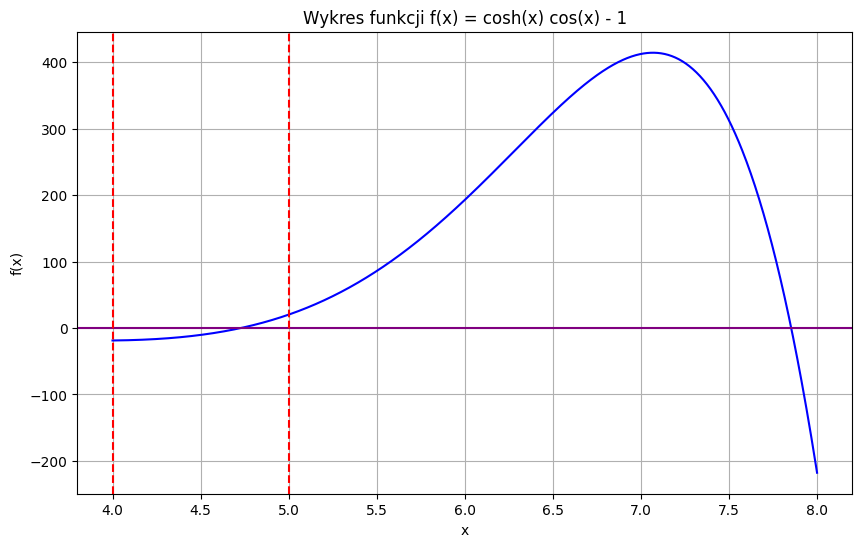

Pierwiastek wyznaczony przez samodzielnie zaimplementowaną metodę Newtona: 10.995607838001671
Pierwiastek wyznaczony przez metodę zaimplementowaną w SciPy: 10.995607838001671


In [33]:
def f(x): return np.cosh(x) * np.cos(x) - 1

def f_derivative(x): return np.cosh(x) * (-np.sin(x)) + np.cosh(x) * np.cos(x)

x_vals = np.linspace(4, 8, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='b')
plt.axhline(0, color='purple')
plt.axvline(4, color='red', linestyle = '--')
plt.axvline(5, color='red', linestyle = '--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x) = cosh(x) cos(x) - 1')
plt.grid(True)
plt.show()

x0 = 4
tol = 1e-16
x, _, _, _ = newton_method(f, f_derivative, x0,tol)
x_scipy = newton(f, x0, f_derivative, tol=tol) 
print(f'Pierwiastek wyznaczony przez samodzielnie zaimplementowaną metodę Newtona: {x}')
print(f'Pierwiastek wyznaczony przez metodę zaimplementowaną w SciPy: {x_scipy}')


Analizując wykres możemy zauważyć, że pierwiastek znajduje się w przedziale $x \in [4,5] $. Wynik wyznaczony przez metodę Newtona wskazuje jednak, że pierwiastek to $10,995$. 

___
# Zadanie 3
 Funkcja `velocity(t)` modeluje prędkość rakiety w zależności od czasu, a `f(t)` to różnica między prędkością rakiety a prędkością dźwięku. Metoda Brenta znajduje pierwiastek tej funkcji w przedziale $ t \in [0, 150] $.

In [34]:
u = 2510  
M0 = 2.8e6  
mdot = 13.3e3  
g = 9.81  
v_target = 335  
a = 0
b = 150

def velocity(t): return u * np.log(M0 / (M0 - mdot * t)) - g * t

def f(t): return velocity(t) - v_target

t_brent, _ , _ , _ = brent_method(f, a, b, tol=1e-6)

t_scipy = brentq(f, a, b, xtol=1e-6)

print(f'Wynik uzyskany za pomocą metody Brenta zaimplementowanej samodzielnie: t = {t_brent}')
print(f'Wynik uzyskany za pomocą metody Brenaa zaimplementowanej w pakiecie SciPy: t = {t_scipy}')


Wynik uzyskany za pomocą metody Brenta zaimplementowanej samodzielnie: t = 70.877972379466
Wynik uzyskany za pomocą metody Brenaa zaimplementowanej w pakiecie SciPy: t = 70.87797227046728


Czas, po którym rakieta osiągnie prędkość dźwięku to około $70,88$ sekundy.

___
# Zadanie 4
Funkcja `gibbs_energy(T)` oblicza wartość energii Gibbsa, a `f(T)` to różnica między tą wartością a zadanym $ G_{\text{target}} $. Metoda Brenta znajduje pierwiastek tej funkcji w przedziale $ T \in [5, 1000] $.

In [35]:
R = 8.31441  
T0 = 4.44418  
G_target = -1e5 

def gibbs_energy(T): return -R * T * np.log((T / T0) ** (5 / 2)) 
def f(T): return gibbs_energy(T) - G_target

T_min = 5  
T_max = 1000  

T_brent, _ , _ , _ = brent_method(f, T_min, T_max, tol=1e-6)
T_scipy = brentq(f, T_min, T_max, xtol=1e-6)

print(f'Wynik uzyskany za pomocą metody Brenta zaimplementowanej samodzielnie: T = {T_brent}')
print(f'Wynik uzyskany za pomocą metody Brenaa zaimplementowanej w pakiecie SciPy: T = {T_scipy}')


Wynik uzyskany za pomocą metody Brenta zaimplementowanej samodzielnie: T = 904.9425824778154
Wynik uzyskany za pomocą metody Brenaa zaimplementowanej w pakiecie SciPy: T = 904.9425832327784


Temperatura, dla której energia Gibbsa osiąga pożądaną wartość to $ 904,94 K$.

___
# Zadanie 5
Zaimplementowana metoda Newtona dla układu równań nieliniowych najpierw obliczane są wartości funkcji i Jacobianu w danym punkcie. Następnie rozwiązywany jest układ równań liniowych $ J \Delta x = -\vec{F(x)} $, gdzie $ J $ to macierz Jacobiego, a $ \vec{F(x)} $ to wektor funkcji. Nowe przybliżenie pierwiastka jest obliczane jako $ x_{\text{next}} = x_{\text{current}} + \Delta x $. Proces powtarza się aż do osiągnięcia wymaganej tolerancji lub maksymalnej liczby iteracji. Metoda zostanie użyta dla układu równań:
$$

\left\{
\begin{aligned}
\tan(x) - y &= 1, \\
\cos(x) - 3 \sin(y) &= 0
\end{aligned}
\right.

$$

In [ ]:
def equations(vars):
    x, y = vars
    eq1 = np.tan(x) - y - 1
    eq2 = np.cos(x) - 3 * np.sin(y)
    return np.array([eq1, eq2])

def jacobian(vars):
    x, y = vars
    dfdx1 = 1/np.cos(x)**2  # Pochodna po x dla eq1
    dfdy1 = -1           # Pochodna po y dla eq1
    dfdx2 = -np.sin(x)   # Pochodna po x dla eq2
    dfdy2 = -3 * np.cos(y)  # Pochodna po y dla eq2
    return np.array([[dfdx1, dfdy1], [dfdx2, dfdy2]])

def newton_system_method(F, J, x_initials, tol=1e-6, max_iter=100):
    x_current = np.array(x_initials, dtype=float)

    for _ in range(max_iter):
        F_current = F(x_current)
        J_current = J(x_current)

        try:
            delta = solve(J_current, -F_current)
        except np.linalg.LinAlgError:
            raise ValueError('Macierz Jacobiego jest osobliwa. Zmień wybór punktów początkowych.')

        x_next = x_current + delta

        if norm(delta, ord=2) < tol:
            return x_next

        x_current = x_next

    raise ValueError('Metoda Newtona nie zbiega w zadanej liczbie iteracji')

x_initials = np.array([0.5, 0.5])

solution = newton_system_method(equations, jacobian, x_initials, tol=1e-4, max_iter=1000)
solution_scipy = newton_krylov(equations, x_initials)
print('Rozwiązanie układu równań wyznaczone samodzielnie zaimplementowaną metodą Newtona:', solution)
print('Rozwiązanie układu równań wyznaczone zaimplementowaną w SciPy metodą Newtona:', solution_scipy)


Rozwiązanie układu równań wyznaczone samodzielnie zaimplementowaną metodą Newtona: [0.88159259 0.21359471]
Rozwiązanie układu równań wyznaczone zaimplementowaną w SciPy metodą Newtona: [0.88159272 0.21359469]


Uzyskane rozwiązanie to: $x = 0,882$ i $y = 0,214$

___
# Zadanie 6
Zaimplementowana metoda Laguerre'a w każdej iteracji, zaczynając od początkowego przybliżenia $ z_0 $, obliczane są wartość wielomianu oraz jego pierwsza i druga pochodna. Następnie, na podstawie tych wartości, obliczany jest nowy punkt przybliżenia. Proces powtarza się, aż osiągnięta zostanie wymagana dokładność lub maksymalna liczba iteracji. Dodatkowo, funkcja `roots_laguerre` znajduje wszystkie pierwiastki wielomianu, usuwając je iteracyjnie z wielomianu poprzez deflację. Metoda zostanie wykorzystana, aby obliczyć pierwiastki wielomianu: $$ W(x) = x^4 + (5 + i)x^3 − (8 − 5i)x^2 + (30 − 14i)x − 84 $$

In [2]:
def laguerre_method(poly_coeffs, z0, tol=1e-16, max_iter=1000):

    n = len(poly_coeffs) - 1  
    p = np.poly1d(poly_coeffs)  
    dp = p.deriv(1) 
    ddp = p.deriv(2) 

    z = z0
    for _ in range(max_iter):
        p_val = p(z)
        dp_val = dp(z)
        ddp_val = ddp(z)

        if abs(p_val) < tol:
            return z

        G = dp_val / p_val
        H = G**2 - (ddp_val / p_val) * (n - 1)
        sqrt_term = np.sqrt((n - 1) * (n * H - G**2))

        if abs(G + sqrt_term) > abs(G - sqrt_term):
            denom = G + sqrt_term
        else:
            denom = G - sqrt_term

        z_next = z - n / denom

        if abs(z_next - z) < tol:
            return z_next
        
        z = z_next
    
    raise ValueError('Metoda Laguerrea nie osiągnęła zbieżności w zadanej liczbie iteracji.')

def roots_laguerre(poly_coeffs, tol=1e-12):

    roots = []
    remaining_coeffs = np.array(poly_coeffs, dtype=complex)

    while len(remaining_coeffs) > 1:
        z0 = 0  
        root = laguerre_method(remaining_coeffs, z0, tol=tol)
        roots.append(root)
        remaining_coeffs = np.polydiv(remaining_coeffs, [1, -root])[0]

    return roots

coeffs = [1, 5 + 1j, -8 + 5j, 30 - 14j, -84]

roots = roots_laguerre(coeffs)
roots_scipy = np.roots(coeffs)
print('Pierwiastki wielomianu wyznaczone metodą Laguerra zaimplementowaną samodzielnie:')
for root in (roots):
    print(root)
print('\nPierwiastki wielomianu wyznaczone metodą zaimplementowaną w SciPy:')
for root in (roots_scipy):
    print(root)

Pierwiastki wielomianu wyznaczone metodą Laguerra zaimplementowaną samodzielnie:
(5.831668919228723e-17+2j)
(2+1.4423816350483375e-17j)
-3j
(-7+0j)

Pierwiastki wielomianu wyznaczone metodą zaimplementowaną w SciPy:
(-7.000000000000002+0j)
(5.851883817201576e-16-2.9999999999999942j)
(1.999999999999997+3.5038630692924374e-16j)
(3.103219225443062e-16+1.9999999999999996j)


Obliczone pierwiastki to:
$$
x_1 = 2i \\
x_2 = 2 \\
x_3 = -3i \\
x_4 = -7 \\
$$